In [1]:
import turicreate

In [2]:
sales = turicreate.SFrame('home_data.sframe')

In [3]:
type(sales)

turicreate.data_structures.sframe.SFrame

## Exploring the data for housing sales

In [7]:
turicreate.visualization.scatter(sales['sqft_living'],sales['price'])

### Create simple regression model of sqft_living to price

In [12]:
train_data, test_data = sales.random_split(.8, seed=0) #.8 means we're splitting 80% of data for training

#### Build the regression model

In [18]:
sqft_model = turicreate.linear_regression.create(train_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.017994     | 4343143.329434     | 1474112.423843       | 264334.543381                   | 234999.934894                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

#### Evaluating the model

In [21]:
test_data['price'].mean()

543054.0425632538

In [22]:
sqft_model.evaluate(test_data)

{'max_error': 4138541.7950436766, 'rmse': 255205.1103903233}

#### A sample prediction

In [27]:
import matplotlib.pyplot as plt

In [29]:
plt

<module 'matplotlib.pyplot' from '/Users/nikhilkapila/miniconda3/envs/uowml/lib/python3.8/site-packages/matplotlib/pyplot.py'>

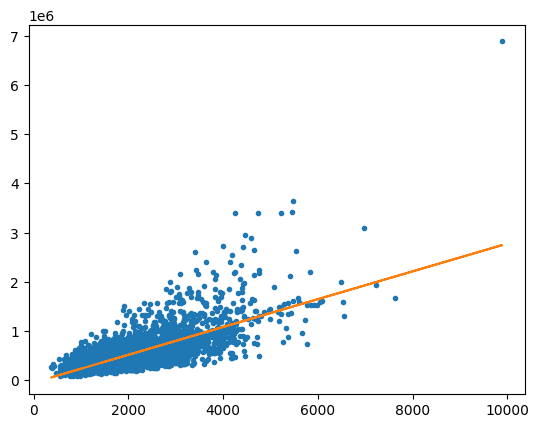

In [33]:
plt.plot(test_data['sqft_living'], test_data['price'], '.',
         test_data['sqft_living'], sqft_model.predict(test_data), '-')

In [37]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-48375.51026593195,5078.241301312473
sqft_living,None,282.59188222671946,2.230985371216841


## Explore other features in the data

In [38]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [40]:
sales[features].show()

Materializing SFrame